In [26]:
# TODO: K-means => calulate m and sigma (initil m and sigma) Done
# TODO: w give random num, theta give one 
# TODO: design basis function
# TODO: design back probagation function
# TODO: construct RBF network
# TODO: 模型套到自走車上

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def euclidean(data,center):
    differ = data - center
    return np.linalg.norm(differ,axis=-1)

def cal_distance(data,center):
    return np.linalg.norm(data - center)

def activation(data,m,sigma):
    return np.exp((-1 * (euclidean(m,data) ** 2) / (2 * sigma ** 2)))

In [116]:
print(sigma)
print(euclidean(np.array([3,5]),np.array([[3,6],[4,4]])))
print(euclidean(np.array([3,5]),np.array([[3,6],[4,4]])) ** 2)

[1.         1.41421356]
[1. 2.]


In [5]:
# Data preprocessing
# train4dAll.txt => 前方距離、右方距離、左方距離、方向盤得出角度(右轉為正，單位是degree)
x_train = []
y_train = []
with open('./train4dAll.txt','r',encoding='utf-8') as f:
    for data in f.readlines():
        data = data.split(' ')
        x_train.append([float(data[0]),float(data[1]),float(data[2])])
        y_train.append(float(data[3]))

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    #y_train = (y_train - min(y_train)) / (max(y_train) - min(y_train))
    #y_train = np.array(y_train)
    print(y_train)
print((max(y_train) - min(y_train)))
print(min(y_train))

[ 0.     0.     0.    ... -4.705 -4.705 -4.705]
80.0
-40.0


In [108]:
import random

def KMeans(datas,K = 3):
    center_pos = random.sample(range(0,len(datas)),K)
    center = datas[center_pos] # data[center_pos] have K 
    sigma = np.zeros(len(x_train[0]))

    for _ in range(100):
        arg = np.zeros(len(x_train))
        #算每個點的距離並給定是哪一群
        for i in range(len(datas)):
            arg[i] = np.argmin([euclidean(datas[i],center)])

        #下一次的center更新
        for c_pos in range(K):
            center[c_pos] =  np.mean(datas[arg == c_pos],axis=0)

    for c_pos in range(K):
        sigma[c_pos] = np.sum(euclidean(datas[arg == c_pos],center[c_pos])) / len(datas[arg == c_pos])

    return center,sigma

In [2]:
N = 200
data1 = np.random.randn(N//2,2) + np.array([5,6])
data2 = np.random.randn(N//2,2) + np.array([-5,-6])
data3 = np.random.randn(N//2,2) + np.array([-10,3])

datas = np.concatenate((data1, data2, data3))

# Creating figure
fig = plt.figure(figsize = (5, 4))
#ax = plt.axes(projection ="3d")
ax = plt.axes()
# Creating plot
ax.scatter(datas[:,0],datas[:,1])
plt.title("simple 2D scatter plot")
 
# show plot
plt.show()

NameError: name 'np' is not defined

In [109]:
center,sigma = KMeans(x_train,3)
print(center,sigma)


[[13.47496246  9.85147614 26.9163614 ]
 [14.38798833 28.76782451 10.55771401]
 [20.5170552   9.01628199  9.32685134]] [5.97785543 5.21302458 4.75058949]


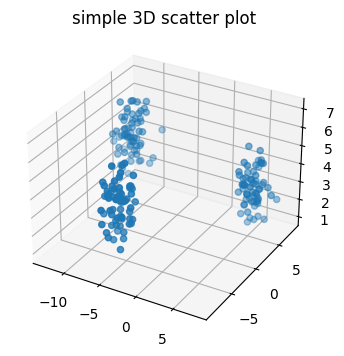

In [33]:
N = 200
data1 = np.random.randn(N//3,3) + np.array([5,6,3])
data2 = np.random.randn(N//3,3) + np.array([-5,-6,4])
data3 = np.random.randn(N//3,3) + np.array([-10,3,5])
datas = np.concatenate((data1, data2, data3))

# Creating figure
fig = plt.figure(figsize = (5, 4))
#ax = plt.axes(projection ="3d")
ax = plt.axes(projection='3d')
# Creating plot
ax.scatter(datas[:,0],datas[:,1],datas[:,2])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

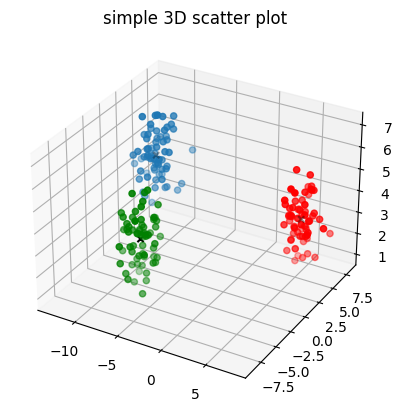

In [37]:
arg,center,sigma = KMeans(datas,3)
first  = datas[arg == 0]
second = datas[arg == 1]
third  = datas[arg == 2]
# Creating figure
#ax = plt.axes(projection ="3d")
ax = plt.axes(projection='3d')
# Creating plot
ax.scatter(center[:,0],center[:,1],center[:,2],color='black',marker='x',zorder=10)
ax.scatter(first[:,0],first[:,1],first[:,2],color='red',zorder=5)
ax.scatter(second[:,0],second[:,1],second[:,2],zorder=2)
ax.scatter(third[:,0], third[:,1],third[:,2],color='g',zorder=1)
plt.title("simple 3D scatter plot")
plt.show()

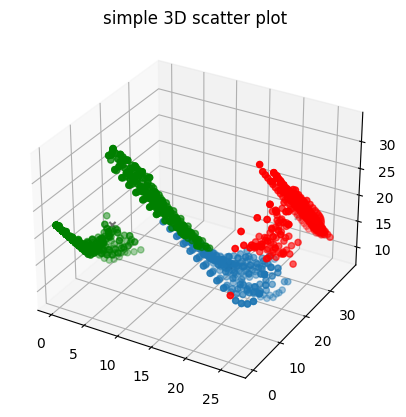

In [107]:
arg,center,sigma = KMeans(x_train,3)
first  = x_train[arg == 0]
second = x_train[arg == 1]
third  = x_train[arg == 2]
# Creating figure
#ax = plt.axes(projection ="3d")
ax = plt.axes(projection='3d')
# Creating plot
ax.scatter(center[:,0],center[:,1],center[:,2],color='black',marker='x',zorder=10)
ax.scatter(first[:,0],first[:,1],first[:,2],color='red',zorder=5)
ax.scatter(second[:,0],second[:,1],second[:,2],zorder=2)
ax.scatter(third[:,0], third[:,1],third[:,2],color='g',zorder=1)
plt.title("simple 3D scatter plot")
plt.show()

In [38]:
#設定隱藏層Node個數
K = 6
#設定W初始值，先隨便給，目前K-means有想到怎麼改快一點，只是先pass做其他的
_,m,sigma = KMeans(x_train,K)
print(m,sigma)
w = np.random.rand(K)
theta = 1.0
#學習率
learning_rate = 0.8

[[14.38798833 28.76782451 10.55771401]
 [20.5170552   9.01628199  9.32685134]
 [13.47496246  9.85147614 26.9163614 ]] [5.21302458 4.75058949 5.97785543]


In [82]:
# print(data)
# print(m)
# print(data - m)
# print((data - m))
# print(euclidean(data,m))
# print(euclidean(data,m) ** 2)
# #print(sigma)
# print((2* (sigma ** 2)))
# print(-1 / (2* (sigma ** 2)) * (euclidean(data,m) ** 2))
# print(np.exp(-1 / (2* (sigma ** 2)) * (euclidean(data,m) ** 2)))
#print(activation(data,m,sigma))
# a = activation(data,m,sigma)
# print(a)
# print(w)
# print(a.T.dot(w))
#new_sigma = sigma + (learning_rate * (label - F) * w * active * (1 / (sigma ** 3)) * (euclidean(data,m) ** 2))


-0.0


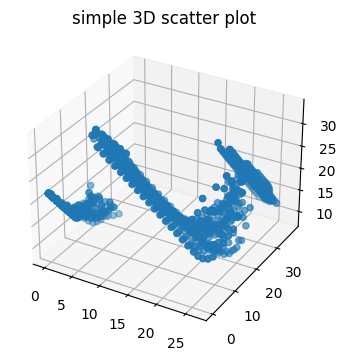

In [102]:
# Creating figure
fig = plt.figure(figsize = (5, 4))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter(x_train[:,0],x_train[:,1],x_train[:,2],zorder=5)
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [50]:
def euclid_distance(x, m):
        distance = np.linalg.norm(x-m, axis=-1)
        return distance

        
def guass_function(x, m, std):
        return np.exp(-1 * (euclid_distance(x, m) ** 2 / (2 * std ** 2)))

def forward(x, m, std, w, delta):
        guass = guass_function(x,m,std)
        return guass, np.dot(guass, w) + delta

In [57]:
#設定隱藏層Node個數
K = 3
#設定W初始值，先隨便給，目前K-means有想到怎麼改快一點，只是先pass做其他的
m,sigma = KMeans(x_train,K)

w = np.random.randn(K)

theta = np.random.randn()

print(m,sigma,w,theta)
#學習率
learning_rate = 0.1

F = 0
preloss = 0
for i in range(1,101):
    loss_sum = 0
    for data,label in zip(x_train,y_train):
        #正向傳遞
        active = activation(data,m,sigma)

        F = w.T.dot(active) + theta

        #print(sum)
        loss_sum += ((label - F) ** 2) / 2
        
        #倒傳遞更新參數
        new_w = w + (learning_rate * (label - F) * active)

        preprocess_m =  learning_rate * (label - F) * w * active * (1 / (sigma ** 2))
        data_sub_m = data - m
        new_m = m + np.array([preprocess_m[i] * data_sub_m[i] for i in range(len(preprocess_m))])

        new_sigma = sigma + (learning_rate * (label - F) * w * active * (1 / (sigma ** 3)) * (euclidean(data,m) ** 2))
        new_theta = theta + (learning_rate * (label - F))

        w = new_w
        m = new_m
        sigma = new_sigma
        theta = new_theta

    #print(loss_sum)
    if i % 10 == 0:
        print("epoch:",i)
        print(loss_sum)
        print("sum(loss_sum) / len(loss_sum)",loss_sum / len(x_train))   
        preloss = loss_sum
        print("------") 


[[14.38798833 28.76782451 10.55771401]
 [20.5170552   9.01628199  9.32685134]
 [13.47496246  9.85147614 26.9163614 ]] [5.21302458 4.75058949 5.97785543] [ 0.50716151 -1.46333865 -1.04602607] -0.5299017658584747
epoch: 10
117239.54076161385
sum(loss_sum) / len(loss_sum) 79.48443441465346
------
epoch: 20
116605.50379036655
sum(loss_sum) / len(loss_sum) 79.05457884092648
------
epoch: 30
119768.20707858699
sum(loss_sum) / len(loss_sum) 81.19878446005897
------
epoch: 40
119962.16127472317
sum(loss_sum) / len(loss_sum) 81.3302788303208
------
epoch: 50
119935.86660193483
sum(loss_sum) / len(loss_sum) 81.31245193351513
------


KeyboardInterrupt: 

In [ ]:
# def activation(data,m,sigma):
#     return np.exp(-(euclidean(m,data) ** 2) / (2 * (sigma ** 2)))
data = np.array([22.0000 ,8.4853 ,8.4853])

m = np.array([[20.5170552 ,  9.01628199 , 9.32685134],
 [13.47496246,  9.85147614 ,26.9163614 ],
 [14.38798833, 28.76782451 ,10.55771401]])
 
sigma = np.array([4.75058949 ,5.97785543 ,5.21302458])
distance = 0
# for test_m in m:
#     print(euclidean(test_m,data))
#     distance += euclidean(test_m,data)
#print(distance)
# print(distance ** 2)
# print(2 * (sigma ** 2))
# print(-distance ** 2 / (2 * (sigma ** 2)))
# print(np.exp(-distance ** 2 / (2 * (sigma ** 2))))
print('-------')
print(euclidean(m,data))

-------
[ 1.78585436 20.35305202 21.76277606]


In [ ]:
# print(euclidean(np.array([[10]]),np.array([[5],[7]])))
# print(euclidean(np.array([[0,0]]),np.array([3,4])))
# print(euclidean(np.array([[0,0]]),np.array([[3,4],[3,4],[3,4]])))
# print(euclidean(np.array([[3,4],[3,4],[3,4]]),np.array([[0,0]])))
# print(euclidean(np.array([[20.5170552 ,  9.01628199 , 9.32685134]]),np.array([[22.     , 8.4853 , 8.4853]])))
# print((np.array([1,1]) / [[3,4],[3,4],[3,4]]))
# print((np.array([3,4]) ** 2))
print(np.array([1,2,3]) * np.array([4,5,6]))
#print(euclidean(np.array([[0,0],[0,0],[0,0]]),np.array([3,4])))

[ 4 10 18]


In [ ]:
#sigma + (learning_rate * (label - F) * w * active * (1 / (sigma ** 3)) * (euclidean(m,data) ** 2))
#print(sigma)
print(data)
print(m)

(data - m)

[12.5819 13.1659  6.0532]
[[22.07310933  9.32497675 79.02354747]
 [14.00157381 51.36057314 78.66414815]
 [12.79918511 11.10245231 73.88759031]]


array([[ -9.49120933,   3.84092325, -72.97034747],
       [ -1.41967381, -38.19467314, -72.61094815],
       [ -0.21728511,   2.06344769, -67.83439031]])

In [ ]:
new_w = w + (learning_rate * (label - F) * active)
print(active)
print(learning_rate)
print(label)
print(F)
print(label - F)
print(learning_rate * (label - F) )
print((learning_rate * (label - F) * active))
print(new_w)
print(theta)
print()

[0.02150112 0.         0.        ]
0.8
0.4411875
0.34985476430675394
0.09133273569324607
0.07306618855459686
[0.001571 0.       0.      ]
[0.83632033 0.4694436  1.41395176]
0.07306618855459686


In [ ]:
# print((label - F))
# print(w)
# print(active)
print("(label - F) * w * active * (1 / (sigma ** 2)): ")
print((label - F) * w * active * (1 / (sigma ** 2)))
print("(data - m):")
print((data - m))
print("(label - F) * w * active * (1 / (sigma ** 2)) * (data - m):")
print((label - F) * w * active * (1 / (sigma ** 2)) * (data - m))
preprocess_m = (label - F) * w * active * (1 / (sigma ** 2))
data_sub_m = data - m

new_m = np.array([preprocess_m[i] * data_sub_m[i] for i in range(len(preprocess_m))])
print(new_m)

(label - F) * w * active * (1 / (sigma ** 2)): 
[-1.51086891  2.45115246  0.        ]
(data - m):
[[ -1.47496246   7.11912386 -18.4310614 ]
 [ -2.38798833 -11.79722451  -2.07241401]
 [ -8.5170552    7.95431801  -0.84155134]]
(label - F) * w * active * (1 / (sigma ** 2)) * (data - m):
[[  2.22847492  17.45005795  -0.        ]
 [  3.60793732 -28.91679587  -0.        ]
 [ 12.86815389  19.49724613  -0.        ]]
[[  2.22847492 -10.75606289  27.84691762]
 [ -5.85332346 -28.91679587  -5.07980269]
 [ -0.           0.          -0.        ]]


In [120]:
print(sigma)
print(-1 / (2 * (sigma ** 2)))
print(euclidean(np.array([3,5]),np.array([[3,6],[4,4]])))
print(euclidean(np.array([3,5]),np.array([[3,6],[4,4]])) ** 2)

[5.8313566  4.03551876 3.98662508]
[-0.01470384 -0.03070232 -0.03146004]
[1.         1.41421356]
[1. 2.]


In [ ]:
def activation(data,m,sigma):
    return np.exp(-1 / (2 * (sigma ** 2)) * (euclidean(m,data) ** 2) )

In [ ]:
# TODO: 三個sensor抓距離
# TODO: 用 train_data 的方向盤角度
# TODO: 算 x,y,phi

# 最好用6D去對答案
#-------------------------
# TODO: [三個距離] 